In [2]:
from __future__ import print_function
import keras
import numpy as np
from PIL import Image
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from utils.custom_generator import custom_image_generator
from utils.image import ImageDataGenerator
from matplotlib.pyplot import imshow

In [9]:
# input image dimensions
img_rows, img_cols = 28, 28

# load the data and split to training and validation sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
num_classes = 10
# MNIST model in Keras using sequential model building
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# compile the network with categorical crossentropy objective function and Adam optimizer. 
# other optimizers include Adam, Adadelta, etc 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])


In [11]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [12]:
train_batch_size = 128
val_batch_size = 128

# convert class vectors to binary class matrices
print (y_train.shape)
print (y_test.shape)
print(y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)
print(y_train[0])

(60000,)
(10000,)
5
(60000, 10)
(10000, 10)
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


In [13]:
# create training and validation generators
train_generator =  custom_image_generator(
    ImageDataGenerator(rescale=1./255),
    x_train, y_train,
    seed=1,  # Use a specific random seed
    batch_size=train_batch_size,  # Use batch size of 128
    )

validation_generator =  custom_image_generator(
    ImageDataGenerator(rescale=1./255),
    x_test, y_test,
    seed=1,  # Use a specific random seed
    batch_size=val_batch_size,  #Use batch size of 128
    )

In [14]:
epochs = 12

# train the network for the number of epochs defined
model.fit_generator(
    generator=train_generator,
    steps_per_epoch=x_train.shape[0] // train_batch_size,
    validation_data = validation_generator,
    validation_steps=x_test.shape[0] // val_batch_size,
    epochs=epochs
    )


Epoch 1/12


ResourceExhaustedError: OOM when allocating tensor with shape[128,32,26,26] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: conv2d_4/convolution = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv2d_3/Relu, conv2d_4/kernel/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: metrics_1/acc/Mean/_263 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_791_metrics_1/acc/Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'conv2d_4/convolution', defined at:
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-ecd11ed4aaca>", line 7, in <module>
    model.add(Conv2D(64, (3, 3), activation='relu'))
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/keras/models.py", line 492, in add
    output_tensor = layer(self.outputs[0])
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/keras/engine/topology.py", line 619, in __call__
    output = self.call(inputs, **kwargs)
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/keras/layers/convolutional.py", line 168, in call
    dilation_rate=self.dilation_rate)
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 3335, in conv2d
    data_format=tf_data_format)
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 781, in convolution
    return op(input, filter)
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 869, in __call__
    return self.conv_op(inp, filter)
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 521, in __call__
    return self.call(inp, filter)
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/tensorflow/python/ops/nn_ops.py", line 205, in __call__
    name=self.name)
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 631, in conv2d
    data_format=data_format, dilations=dilations, name=name)
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3271, in create_op
    op_def=op_def)
  File "/groups/mousebrainmicro/home/base/anaconda3/envs/tf_1.6_cuda_9.0/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1650, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[128,32,26,26] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[Node: conv2d_4/convolution = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](conv2d_3/Relu, conv2d_4/kernel/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[Node: metrics_1/acc/Mean/_263 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_791_metrics_1/acc/Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



In [27]:
model.save('./models/mnist_model.h5')

In [28]:
# load pre-trained model
model = load_model('./models/mnist_model.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

img_height 1300
img_width 1300
(1, 28, 28, 1)


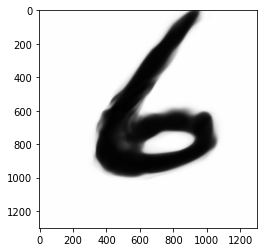

In [29]:
# load image
img = Image.open('images/mnist_img_2.png')
imshow(img)
print ('img_height', img.size[0])
print ('img_width', img.size[1])
# convert to grayscale and reshape the array to the network input size
resized_img = img.resize((img_cols, img_rows))
resized_img = resized_img.convert('L')
resized_img = np.asarray(resized_img, dtype=np.float32)
resized_img/=255
resized_img = np.reshape(resized_img, (1, img_rows, img_cols, 1))
print(resized_img.shape)

In [30]:
# predict number based on the network output
out = model.predict(resized_img)
print ("Softmax values:", out)
print("This number is", out.argmax())

Softmax values: [[3.9981320e-03 1.0569946e-06 3.0394837e-08 5.3709577e-04 3.1471759e-06
  1.5363409e-01 8.4181893e-01 1.9620772e-06 1.5259383e-06 4.1414401e-06]]
This number is 6
